In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

                                                    Importamos los data set

In [79]:
df_sales = pd.read_csv('sales_data.csv')
df_customers = pd.read_csv('customer_data.csv')

                                           #Analisis Exploratorio de df_customer#

- Dimensiones del Data Frame (DF en adelante).

- Header del DF.

- Info del DF (Permite saber si existen valores nulos, el tipo de los datos contenidos y una vista con mas
 detalle de las columnas).


In [81]:
print('--- Caracteristicas del DataFrame Customers ---')

print(df_customers.shape)

print(df_customers.head())

print(df_customers.info())

--- Caracteristicas del DataFrame Customers ---
(99457, 4)
  customer_id  gender   age payment_method
0     C241288  Female  28.0    Credit Card
1     C111565    Male  21.0     Debit Card
2     C266599    Male  20.0           Cash
3     C988172  Female  66.0    Credit Card
4     C189076  Female  53.0           Cash
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB
None


                                                    #Informacion sobre Customers
                                                        
                                                        ## Dimensiones

- 4 Columnas y 99457 Filas.

                                                        ## Encabezados

- customer_id (object), gender(object), age(float64) y payment_method (object).

- Ninguno contiene valores nulos

                                                  #Modificaciones al DF Customers
_Previo a realizar cambios creamos un nuevo DF que nos permita conservar inmutables los originales. Luego procedemos a realizar lo siguiente_
- Cambiar el tipo de datos de object a string.
- Reordenar el DF en base a la columna costumer_id.
- Poner los nombres de las columnas en mayusculas (luego podran ser usados como las etiquetas de graficos).
- Chequear si existen valores duplicados para customer_id.



                                             ### Cambiar el tipo de datos de object a string

In [82]:
df_compradores = df_customers
df_compradores = df_compradores.astype({'customer_id':'str','gender':'str', 'payment_method':'str'})
print(df_compradores.dtypes)
'''En Pandas object almacena cadenas de texto (str) razon por la cual el print anterior los sigue
mostrando como object, induciendonos al error de que no tuve efecto el .astype. Para corroborarlo, debemos
pedir el tipo de dato, columna por columna.'''
print(type(df_compradores['customer_id'].iloc[0]))
print(type(df_compradores['gender'].iloc[1]))
print(type(df_compradores['payment_method'].iloc[3]))

customer_id        object
gender             object
age               float64
payment_method     object
dtype: object
<class 'str'>
<class 'str'>
<class 'str'>


                                      ### Reordenar el DF en base a la columna costumer_id

In [83]:
df_compradores = df_compradores.sort_values(by='customer_id')
print(df_compradores.head())

      customer_id  gender   age payment_method
42195     C100004    Male  61.0    Credit Card
80560     C100005    Male  34.0           Cash
13070     C100006    Male  44.0    Credit Card
53587     C100012    Male  25.0           Cash
4073      C100019  Female  21.0    Credit Card


                                         ### Poner los nombres de las columnas en mayusculas

In [84]:
df_compradores.columns = df_compradores.columns.str.upper()
print(df_compradores.head())

      CUSTOMER_ID  GENDER   AGE PAYMENT_METHOD
42195     C100004    Male  61.0    Credit Card
80560     C100005    Male  34.0           Cash
13070     C100006    Male  44.0    Credit Card
53587     C100012    Male  25.0           Cash
4073      C100019  Female  21.0    Credit Card


                                         ### Chequear si existen valores duplicados para customer_id

In [85]:
duplicados = df_compradores['CUSTOMER_ID'].duplicated(keep=False)

total_duplicados = duplicados.sum()

print(f"Número total de filas con un 'customer_id' duplicado: {total_duplicados}")

Número total de filas con un 'customer_id' duplicado: 0


                                              # Analisis Exploratorio de df_sales
- Dimensiones del Data Frame.

- Header del DF.

- Info del DF.

In [88]:
print('--- Caracteristicas del DataFrame Sales ---')

print(df_sales.shape)

print(df_sales.head())

print(df_sales.info())

--- Caracteristicas del DataFrame Sales ---
(99457, 7)
  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   05-08-2022   
1    I317333     C111565     Shoes         3  1800.51   12-12-2021   
2    I127801     C266599  Clothing         1   300.08   09-11-2021   
3    I173702     C988172     Shoes         5  3000.85   16-05-2021   
4    I337046     C189076     Books         4    60.60   24-10-2021   

    shopping_mall  
0          Kanyon  
1  Forum Istanbul  
2       Metrocity  
3    Metropol AVM  
4          Kanyon  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-nu

                                                #Informacion sobre Sales
                                                    
                                                    ## Dimensiones
- 7 Columnas y 99457 Filas.

                                                  ## Encabezados

- invoice_no (object),customer_id (object), category (object), quantity (int64), price (float64), invoice_date (object) y shopping_mall (object).

- Ninguno contiene valores nulos

                                                 #Modificaciones al DF Sales
_Previo a realizar cambios creamos un nuevo DF que nos permita conservar inmutables los originales. Luego procedemos a realizar lo siguiente_

- Cambiar el tipo de datos de object a string (en columnas que corresponda).
- Cambiar a formato DATETIME los valores de la columna invoice_date.
- Reordenar el DF en base a la columna costumer_id.
- Poner los nombres de las columnas en mayusculas.
- Chequear si existen valores duplicados para customer_id e invoice_no.

                                       ### Cambiar tipos de datos a str y datetime

In [90]:
df_ventas = df_sales

df_ventas = df_ventas.astype({'invoice_no':'str','customer_id':'str','category':'str', 'shopping_mall':'str'})
print(df_ventas.dtypes)



df_ventas['invoice_date'] = pd.to_datetime(df_ventas['invoice_date'], dayfirst=True)
df_ventas['invoice_date'] = df_ventas['invoice_date'].dt.strftime('%d-%m-%Y')
print(df_ventas.head())


print(df_ventas.head())
print(type(df_ventas['invoice_no'].iloc[0]))
print(type(df_ventas['customer_id'].iloc[1]))
print(type(df_ventas['category'].iloc[2]))
print(type(df_ventas['shopping_mall'].iloc[6]))
print(type(df_ventas['invoice_date'].iloc[5]))

invoice_no        object
customer_id       object
category          object
quantity           int64
price            float64
invoice_date      object
shopping_mall     object
dtype: object
  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   05-08-2022   
1    I317333     C111565     Shoes         3  1800.51   12-12-2021   
2    I127801     C266599  Clothing         1   300.08   09-11-2021   
3    I173702     C988172     Shoes         5  3000.85   16-05-2021   
4    I337046     C189076     Books         4    60.60   24-10-2021   

    shopping_mall  
0          Kanyon  
1  Forum Istanbul  
2       Metrocity  
3    Metropol AVM  
4          Kanyon  
  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   05-08-2022   
1    I317333     C111565     Shoes         3  1800.51   12-12-2021   
2    I127801     C266599  Clothing         1   300.08   09-1

                                        ### Reordenar el DF en base a la columna costumer_id

In [91]:
df_ventas = df_ventas.sort_values(by='customer_id')
print(df_ventas.head())

      invoice_no customer_id         category  quantity    price invoice_date  \
42195    I178410     C100004         Clothing         5  1500.40   26-11-2021   
80560    I158163     C100005            Shoes         2  1200.34   03-03-2023   
13070    I262373     C100006             Toys         3   107.52   01-12-2022   
53587    I334895     C100012  Food & Beverage         5    26.15   15-08-2021   
4073     I202043     C100019             Toys         1    35.84   25-07-2021   

      shopping_mall  
42195     Metrocity  
80560        Kanyon  
13070   Cevahir AVM  
53587        Kanyon  
4073      Metrocity  


                                        ### Poner los nombres de las columnas en mayusculas

In [92]:
df_ventas.columns = df_ventas.columns.str.upper()
print(df_ventas.head())

      INVOICE_NO CUSTOMER_ID         CATEGORY  QUANTITY    PRICE INVOICE_DATE  \
42195    I178410     C100004         Clothing         5  1500.40   26-11-2021   
80560    I158163     C100005            Shoes         2  1200.34   03-03-2023   
13070    I262373     C100006             Toys         3   107.52   01-12-2022   
53587    I334895     C100012  Food & Beverage         5    26.15   15-08-2021   
4073     I202043     C100019             Toys         1    35.84   25-07-2021   

      SHOPPING_MALL  
42195     Metrocity  
80560        Kanyon  
13070   Cevahir AVM  
53587        Kanyon  
4073      Metrocity  


                                    ### Chequear si existen valores duplicados para customer_id e invoice_no

In [93]:
duplicados = df_ventas['CUSTOMER_ID'].duplicated(keep=False)

total_duplicados = duplicados.sum()

print(f"Número total de filas con un 'customer_id' duplicado: {total_duplicados}")

duplicados_in = df_ventas['INVOICE_NO'].duplicated(keep=False)

total_duplicados_in = duplicados_in.sum()

print(f"Número total de filas con un 'invoice_no' duplicado: {total_duplicados_in}")

Número total de filas con un 'customer_id' duplicado: 0
Número total de filas con un 'invoice_no' duplicado: 0


In [94]:
duplicados_cust = df_ventas['CUSTOMER_ID'].duplicated().sum()
duplicados_inv = df_ventas['INVOICE_NO'].duplicated().sum()
print(f"N° de customer_id duplicados: {duplicados_cust}")
print(f"N° de invoice_no duplicados: {duplicados_inv}")


N° de customer_id duplicados: 0
N° de invoice_no duplicados: 0


                                                 # Unir ambos DF mediante la columna CUSTOMER_ID

In [95]:
df_compradores_ventas = pd.merge(df_compradores, df_ventas, on='CUSTOMER_ID', how='inner')
print(df_compradores_ventas)

      CUSTOMER_ID  GENDER   AGE PAYMENT_METHOD INVOICE_NO         CATEGORY  \
0         C100004    Male  61.0    Credit Card    I178410         Clothing   
1         C100005    Male  34.0           Cash    I158163            Shoes   
2         C100006    Male  44.0    Credit Card    I262373             Toys   
3         C100012    Male  25.0           Cash    I334895  Food & Beverage   
4         C100019  Female  21.0    Credit Card    I202043             Toys   
...           ...     ...   ...            ...        ...              ...   
99452     C999886    Male  61.0     Debit Card    I325647  Food & Beverage   
99453     C999910    Male  41.0     Debit Card    I256358            Books   
99454     C999974  Female  29.0           Cash    I143068         Clothing   
99455     C999976  Female  49.0     Debit Card    I219600             Toys   
99456     C999995  Female  57.0           Cash    I200805         Clothing   

       QUANTITY    PRICE INVOICE_DATE     SHOPPING_MALL  
0    

                                               # Reagrupación de variables de los DF
_Basados en el analisis exploratorio hemos visto la necesidad de reagrupar variables para poder realzar un analisis de los datos contenidos, que resulte mas eficaz.
Para ello hemos identificado que las variables AGE  y PRICE deben ser convertidas a intervalos._



                                                ## Conversión de la variable AGE

- Identificar valores minimos y maximos de la variable.
- Crear intervalos que agrupen los valores correspondientes a la edad.

In [96]:
df_compradores_ventas['AGE'].describe()

count    99338.000000
mean        43.425859
std         14.989400
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: AGE, dtype: float64

_Ahora que ya sabemos que la edad minima es 18 años y que la edad maxima es 69 años, podemos calcular el
Rango Total (valor maximo menos valor minimo) para poder ver de cuanto deberan ser los intervalos._


In [97]:
valor_maximo_age = df_compradores_ventas['AGE'].max()
valor_minimo_age = df_compradores_ventas['AGE'].min()
rango_total_age = valor_maximo_age - valor_minimo_age
intervalos_age = rango_total_age / 5
print(f'El rango total de la variable AGE es {rango_total_age}.')
print(f'Los intervalos deben ser de {intervalos_age} años.')

El rango total de la variable AGE es 51.0.
Los intervalos deben ser de 10.2 años.


In [98]:
bins = [18, 28, 38, 48, 58, 70]
labels = ['18 - 27 Años', '28 - 37 Años', '38 - 47 Años', '48 - 57 Años', '58 - 70 Años']

df_compradores_ventas['INTERVALOS_AGE'] = pd.cut(
    df_compradores_ventas['AGE'], bins = bins,
    labels = labels, include_lowest = True,
    right = True
)

print("#--- DF con la nueva columna de rango ---#")
print(df_compradores_ventas[['AGE', 'INTERVALOS_AGE']].head())


#--- DF con la nueva columna de rango ---#
    AGE INTERVALOS_AGE
0  61.0   58 - 70 Años
1  34.0   28 - 37 Años
2  44.0   38 - 47 Años
3  25.0   18 - 27 Años
4  21.0   18 - 27 Años


                                                  ## Conversión de la variable PRICE
- Identificar valores minimos y maximos de la variable.
- Crear intervalos que agrupen los valores correspondientes a la edad.

In [99]:
df_compradores_ventas['PRICE'].describe()

count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: PRICE, dtype: float64

_Ahora ya conocemos los valores minimo (5.23) y maximo (5250.00) podemos utilizar los cuartiles para ayudarnos a definir
los puntos de corte de nuestros intervalos._
_No Usamos la misma metodologia con la que creamos el intervalo de edad por la naturaleza y la distribucion que los datos de
PRICE presentan. Para crear el intervalo hicimos lo siguiente_

In [100]:
bins = [ df_compradores_ventas['PRICE'].min() - 0.01,
    45.45,
    203.30,
    1200.32,
    df_compradores_ventas['PRICE'].max() + 0.01
]

labels = ['Bajo (5-45)', 'Medio (45-203)', 'Alto (203-1200)', 'Premium (>1200)']

df_compradores_ventas['INTERVALOS_PRICE'] = pd.cut(
    df_compradores_ventas['PRICE'], bins = bins,
    labels = labels, include_lowest = True,
    right = True
)

print("#--- DF con la nueva columna de rango ---#")
print(df_compradores_ventas[['PRICE', 'INTERVALOS_PRICE']].head())


#--- DF con la nueva columna de rango ---#
     PRICE INTERVALOS_PRICE
0  1500.40  Premium (>1200)
1  1200.34  Premium (>1200)
2   107.52   Medio (45-203)
3    26.15      Bajo (5-45)
4    35.84      Bajo (5-45)


                                               # Analisis de frecuencia de variables

_Realizaremos un analisis de frecuencias de las variables de intervalos creadas anteriormente (INTERVALOS_AGE,INTERVALOS_PRICE) junto con las variables genero (GENDER), metodo de pago (PAYMENT_METHOD), categoria a la que corresponde la compra (CATEGORY) y centro comercial donde se adquirieron (SHOPPING_MALL).
Con estos resultados nos sera mas sencillo realizar los analisis mediante graficos varios._

In [101]:
conteo_frecuencias = [ 'GENDER','INTERVALOS_AGE', 'INTERVALOS_PRICE', 'PAYMENT_METHOD', 'CATEGORY', 'SHOPPING_MALL']

print('--- ANÁLISIS DE FRECUENCIAS DE VARIABLES  ---')
print('-' * 50)

for variables in conteo_frecuencias:
        conteo_frecuencia = df_compradores_ventas[variables].value_counts().rename('COUNT')
        conteo_porcentaje = (df_compradores_ventas[variables].value_counts(normalize=True) * 100).rename('PERCENTAGE (%)').round(2)
        resultado_frecuencias = pd.concat([conteo_frecuencia, conteo_porcentaje], axis=1)

        print(f' Frecuencia para: {variables.upper()}')
        print('-' * (20 + len(variables)))
        print(resultado_frecuencias)

--- ANÁLISIS DE FRECUENCIAS DE VARIABLES  ---
--------------------------------------------------
 Frecuencia para: GENDER
--------------------------
        COUNT  PERCENTAGE (%)
GENDER                       
Female  59482           59.81
Male    39975           40.19
 Frecuencia para: INTERVALOS_AGE
----------------------------------
                COUNT  PERCENTAGE (%)
INTERVALOS_AGE                       
18 - 27 Años    21136           21.28
58 - 70 Años    20887           21.03
28 - 37 Años    19202           19.33
38 - 47 Años    19193           19.32
48 - 57 Años    18920           19.05
 Frecuencia para: INTERVALOS_PRICE
------------------------------------
                  COUNT  PERCENTAGE (%)
INTERVALOS_PRICE                       
Alto (203-1200)   30476           30.64
Bajo (5-45)       25840           25.98
Medio (45-203)    24100           24.23
Premium (>1200)   19041           19.14
 Frecuencia para: PAYMENT_METHOD
----------------------------------
                C

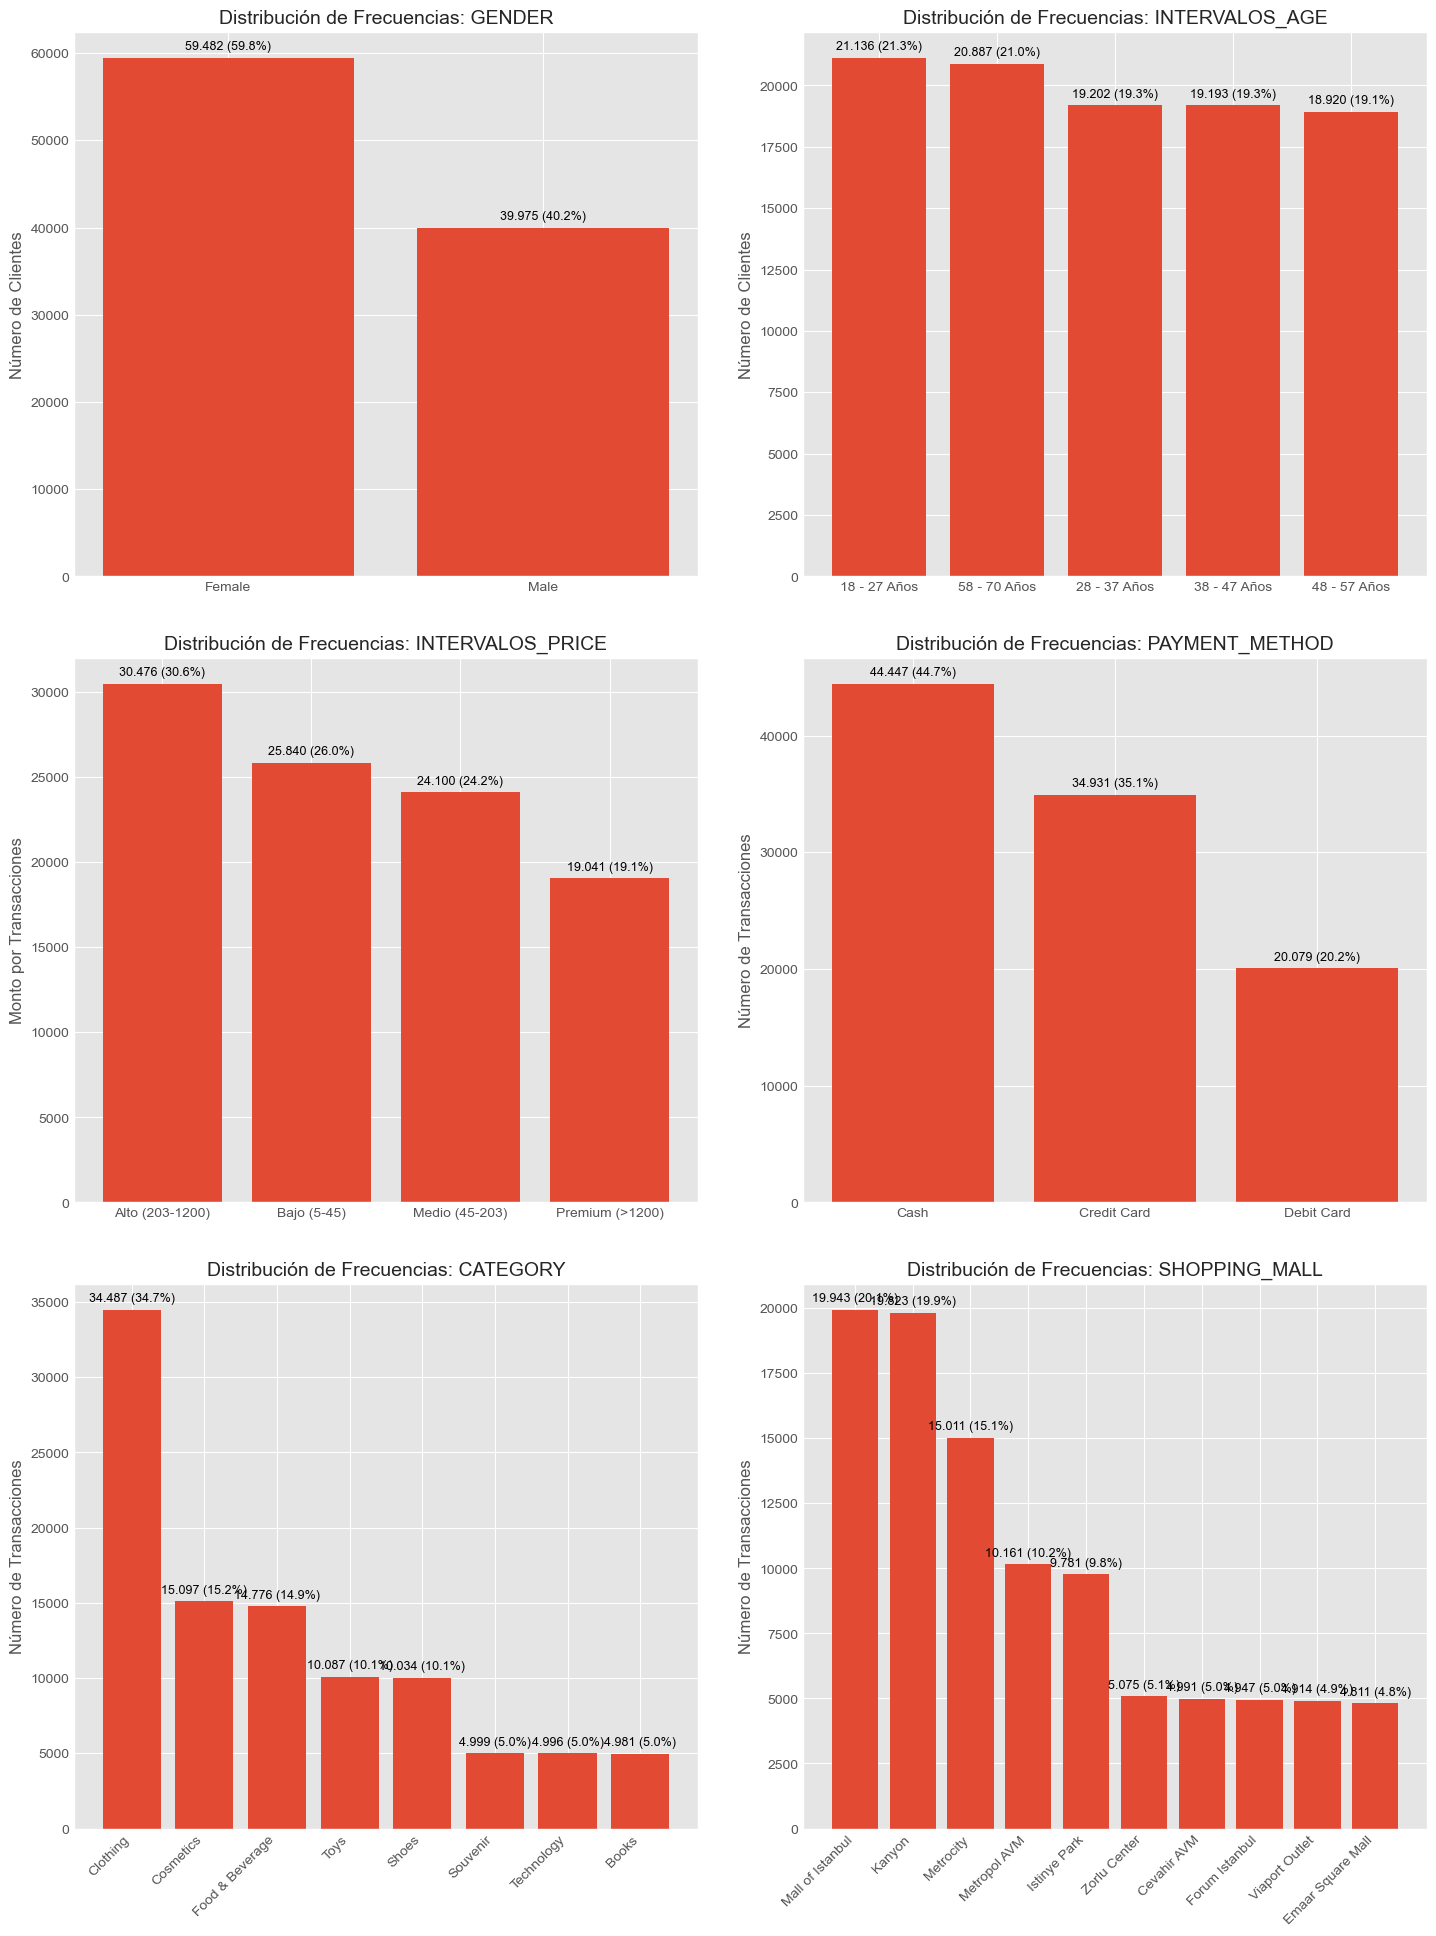

In [102]:

data_frecuencias = {
    'GENDER': pd.DataFrame({
        'COUNT': [59482, 39975],
        'PERCENTAGE (%)': [59.81, 40.19]
    }, index=['Female', 'Male']),
    'INTERVALOS_AGE': pd.DataFrame({
        'COUNT': [21136, 20887, 19202, 19193, 18920],
        'PERCENTAGE (%)': [21.28, 21.03, 19.33, 19.32, 19.05]
    }, index=['18 - 27 Años', '58 - 70 Años', '28 - 37 Años', '38 - 47 Años', '48 - 57 Años']),
    'INTERVALOS_PRICE': pd.DataFrame({
        'COUNT': [30476, 25840, 24100, 19041],
        'PERCENTAGE (%)': [30.64, 25.98, 24.23, 19.14]
    }, index=['Alto (203-1200)', 'Bajo (5-45)', 'Medio (45-203)', 'Premium (>1200)']),
    'PAYMENT_METHOD': pd.DataFrame({
        'COUNT': [44447, 34931, 20079],
        'PERCENTAGE (%)': [44.69, 35.12, 20.19]
    }, index=['Cash', 'Credit Card', 'Debit Card']),
    'CATEGORY': pd.DataFrame({
        'COUNT': [34487, 15097, 14776, 10087, 10034, 4999, 4996, 4981],
        'PERCENTAGE (%)': [34.68, 15.18, 14.86, 10.14, 10.09, 5.03, 5.02, 5.01]
    }, index=['Clothing', 'Cosmetics', 'Food & Beverage', 'Toys', 'Shoes', 'Souvenir', 'Technology', 'Books']),
    'SHOPPING_MALL': pd.DataFrame({
        'COUNT': [19943, 19823, 15011, 10161, 9781, 5075, 4991, 4947, 4914, 4811],
        'PERCENTAGE (%)': [20.05, 19.93, 15.09, 10.22, 9.83, 5.10, 5.02, 4.97, 4.94, 4.84]
    }, index=['Mall of Istanbul', 'Kanyon', 'Metrocity', 'Metropol AVM', 'Istinye Park', 'Zorlu Center', 'Cevahir AVM', 'Forum Istanbul', 'Viaport Outlet', 'Emaar Square Mall'])
}
conteo_frecuencias = ['GENDER','INTERVALOS_AGE', 'INTERVALOS_PRICE', 'PAYMENT_METHOD', 'CATEGORY', 'SHOPPING_MALL']

y_labels = {
    'GENDER': 'Número de Clientes',
    'INTERVALOS_AGE': 'Número de Clientes',
    'INTERVALOS_PRICE': 'Monto por Transacciones', 
    'PAYMENT_METHOD': 'Número de Transacciones',
    'CATEGORY': 'Número de Transacciones',
    'SHOPPING_MALL': 'Número de Transacciones'
}
# ------------------------------------------

plt.style.use('ggplot')
plt.figure(figsize=(15, 20)) 


for i, variables in enumerate(conteo_frecuencias):
    
    resultado_frecuencias = data_frecuencias[variables]
    
    
    plt.subplot(3, 2, i + 1) 
    
    
    bars = plt.bar(resultado_frecuencias.index, resultado_frecuencias['COUNT'])
    
    
    plt.title(f'Distribución de Frecuencias: {variables.upper()}', fontsize=14)
    
    plt.ylabel(y_labels[variables], fontsize=12) 
    # -----------------------------------------------------
    
    
    if len(resultado_frecuencias.index) > 5:
        plt.xticks(rotation=45, ha='right')
    else:
        plt.xticks(rotation=0)
    
    
    for bar, percent in zip(bars, resultado_frecuencias['PERCENTAGE (%)']):
        yval = bar.get_height()
        
        
        label = f'{int(yval):,} ({percent:.1f}%)'.replace(',', '.') 
        plt.text(bar.get_x() + bar.get_width()/2, yval + (max(resultado_frecuencias['COUNT']) * 0.01), 
                 label, 
                 ha='center', 
                 va='bottom', 
                 fontsize=9,
                 color='black')

plt.tight_layout(pad=3.0) 
plt.show()

                                                                  # PRE-ANALISIS

_ Observando los conteos de frecuencia, a primera vista ya podemos empezar a extraer informacion significativa de nuestros datos,
podemos afirmar que: _   
- La clientela esta compuesta en un 60% por mujeres.  
- la distribucion de la edad de los compradores es bastante simetrica (cada intervalo concentra entre el 19 y el 21 % de los consumidores).
- Los tickets premium solo representan el 19% de las ventas mientras que los tickets medios y bajos concentran el 50%.
- El uso de tarjetas (credito y debito) esta presente en el 55% de las compras que se efectuan.
- indumentaria es la categoria mas fuerte con un 34% mientras que el 50% lo componen una canasta que incluye cosmetica, calzados, juguetes y
  comida y bebidas.
- Dos centros comerciales (Mall of Istanbul y Kanyon) estan practicamente empatados respecto al porcentaje de ventas y que sumados a los dos que
  le siguen concentran el 61% de los consumos.
  

                                                               # CREACIÓN DE UN NUEVO DF

_ Una vez realizado el pre-analisis procedemos a crear un nuevo DF en el cual conservaremos las columnas que, creemos, nos resultaran utiles
para un analisis mas pormenorizado. _

In [103]:
df_compradores_ventas.head()


,CUSTOMER_ID,GENDER,AGE,PAYMENT_METHOD,INVOICE_NO,CATEGORY,QUANTITY,PRICE,INVOICE_DATE,SHOPPING_MALL,INTERVALOS_AGE,INTERVALOS_PRICE
0,C100004,Male,61.0,Credit Card,I178410,Clothing,5,1500.40,26-11-2021,Metrocity,58 - 70 Años,Premium (>1200)
1,C100005,Male,34.0,Cash,I158163,Shoes,2,1200.34,03-03-2023,Kanyon,28 - 37 Años,Premium (>1200)
2,C100006,Male,44.0,Credit Card,I262373,Toys,3,107.52,01-12-2022,Cevahir AVM,38 - 47 Años,Medio (45-203)
3,C100012,Male,25.0,Cash,I334895,Food & Beverage,5,26.15,15-08-2021,Kanyon,18 - 27 Años,Bajo (5-45)
4,C100019,Female,21.0,Credit Card,I202043,Toys,1,35.84,25-07-2021,Metrocity,18 - 27 Años,Bajo (5-45)


In [104]:

encabezados= df_compradores_ventas.columns
print(encabezados)
seleccion = ['CUSTOMER_ID', 'GENDER', 'PAYMENT_METHOD','CATEGORY', 'QUANTITY', 'INVOICE_DATE', 'SHOPPING_MALL',
       'INTERVALOS_AGE', 'INTERVALOS_PRICE']
df_analisis = df_compradores_ventas[seleccion].copy()
print(df_analisis)

Index(['CUSTOMER_ID', 'GENDER', 'AGE', 'PAYMENT_METHOD', 'INVOICE_NO',
       'CATEGORY', 'QUANTITY', 'PRICE', 'INVOICE_DATE', 'SHOPPING_MALL',
       'INTERVALOS_AGE', 'INTERVALOS_PRICE'],
      dtype='object')
      CUSTOMER_ID  GENDER PAYMENT_METHOD         CATEGORY  QUANTITY  \
0         C100004    Male    Credit Card         Clothing         5   
1         C100005    Male           Cash            Shoes         2   
2         C100006    Male    Credit Card             Toys         3   
3         C100012    Male           Cash  Food & Beverage         5   
4         C100019  Female    Credit Card             Toys         1   
...           ...     ...            ...              ...       ...   
99452     C999886    Male     Debit Card  Food & Beverage         3   
99453     C999910    Male     Debit Card            Books         3   
99454     C999974  Female           Cash         Clothing         5   
99455     C999976  Female     Debit Card             Toys         3   
99456  

                                                # DataFrame  ANALISIS (df_analisis)
- Cambiamos el nombre de las Variables  INTERVALOS_AGE e INTERVALOS_PRICE por AGE y PRICE y ademas sacamos de todos los
encabezados los guines bajos.

In [105]:
df_analisis.rename(columns={'INTERVALOS_AGE': 'AGE', 'INTERVALOS_PRICE': 'PRICE'}, inplace=True)
df_analisis.columns = df_analisis.columns.str.replace('_', ' ')
print(df_analisis.columns)


Index(['CUSTOMER ID', 'GENDER', 'PAYMENT METHOD', 'CATEGORY', 'QUANTITY',
       'INVOICE DATE', 'SHOPPING MALL', 'AGE', 'PRICE'],
      dtype='object')


                                                 ## ANALISIS DE VARIABLE GÉNERO

_ Comenzaremos tomando la variable genero (GENDER). Como observamos en el pre-analisis la mayoria de los compradores eran mujeres,
pero quedarnos ahi seria seria un error. Es por esto que vamos a realizar los siguientes entrecruzamientos:

- Genero con edad (AGE) para conocer mas caracteristicas de nuestra muestra.
- Genero con cantidad de productos (QUANTITY): Observemos si es que ademas de ser mas clientes, las mujeres son tambien las que mas compran,
  o en realidad son los hombres.
- Genero con precio (PRICE) para saber si hay algun sesgo de genero a la hora de gastar.
- Genero con tipo de producto (CATEGORY) para conocer que es lo que consumen hombres y mujeres.
- Genero con comercio (SHOPPING MALL) para saber si existe alguna tendencia respecto de donde compran unos y otros.
- Genero con metodo de pago (PAYMENT METHOD).
  

In [106]:
print('======================================================================')
print('                 ANÁLISIS INTRAGRUPO (GENDER) SOBRE df_analisis')
print('======================================================================')

frecuencia_edad_genero = (df_analisis.groupby('GENDER')['AGE'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2) )
print('\n--- CRUCE: GÉNERO vs. EDAD (DISTRIBUCIÓN INTRAGRUPO) ---')
print('-' * 70)
print(frecuencia_edad_genero)

print('=' * 70)

total_quantity_genero = df_analisis.groupby('GENDER')['QUANTITY'].sum().rename('Total Artículos')
total_general_quantity = total_quantity_genero.sum()
porcentaje_quantity = (total_quantity_genero / total_general_quantity * 100).round(2).rename('Porcentaje (%)')
tabla_quantity = pd.concat([total_quantity_genero, porcentaje_quantity], axis=1)
print('\n--- CRUCE: GÉNERO vs. CANTIDAD (VOLUMEN TOTAL) ---')
print('-' * 70)
print(tabla_quantity)

print('=' * 70)


conteo_quantity_genero = (df_analisis.groupby('GENDER')['QUANTITY'].value_counts().unstack(fill_value=0).sort_index(axis=1))
print('\n--- CRUCE: GÉNERO vs. CANTIDAD (FRECUENCIA ABSOLUTA) ---')
print('-' * 70)
print(conteo_quantity_genero)

print('=' * 70)


porcentaje_quantity_genero = (df_analisis.groupby('GENDER')['QUANTITY'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2))
print('\n--- CRUCE: GÉNERO vs. CANTIDAD (DISTRIBUCIÓN INTRAGRUPO) ---')
print('-' * 70)
print(porcentaje_quantity_genero)

print('=' * 70)

frecuencia_price_genero = (df_analisis.groupby('GENDER')['PRICE'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2))
print('\n--- CRUCE: GÉNERO vs. PRECIO (DISTRIBUCIÓN DE INTERVALOS) ---')
print('-' * 70)
print(frecuencia_price_genero)

print('=' * 70)



frecuencia_categoria_genero = (df_analisis.groupby('GENDER')['CATEGORY'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2))
print('\n--- CRUCE: GÉNERO vs. CATEGORÍA (CONSUMO INTRAGRUPO) ---')
print('-' * 70)
print(frecuencia_categoria_genero)

print('=' * 70)



frecuencia_mall_genero = (df_analisis.groupby('GENDER')['SHOPPING MALL'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2))
print('\n--- CRUCE: GÉNERO vs. COMERCIO (LUGAR DE COMPRA) ---')
print('-' * 70)
print(frecuencia_mall_genero)

print('=' * 70)



frecuencia_pago_genero = (df_analisis.groupby('GENDER')['PAYMENT METHOD'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2))

print('\n--- CRUCE: GÉNERO vs. MÉTODO DE PAGO (PREFERENCIAS) ---')
print('-' * 70)
print(frecuencia_pago_genero)

print('======================================================================')

                 ANÁLISIS INTRAGRUPO (GENDER) SOBRE df_analisis

--- CRUCE: GÉNERO vs. EDAD (DISTRIBUCIÓN INTRAGRUPO) ---
----------------------------------------------------------------------
AGE     18 - 27 Años  28 - 37 Años  38 - 47 Años  48 - 57 Años  58 - 70 Años
GENDER                                                                      
Female         21.20         19.29         19.37         19.13         21.01
Male           21.39         19.39         19.25         18.92         21.05

--- CRUCE: GÉNERO vs. CANTIDAD (VOLUMEN TOTAL) ---
----------------------------------------------------------------------
        Total Artículos  Porcentaje (%)
GENDER                                 
Female           178659           59.81
Male             120053           40.19

--- CRUCE: GÉNERO vs. CANTIDAD (FRECUENCIA ABSOLUTA) ---
----------------------------------------------------------------------
QUANTITY      1      2      3      4      5
GENDER                                     

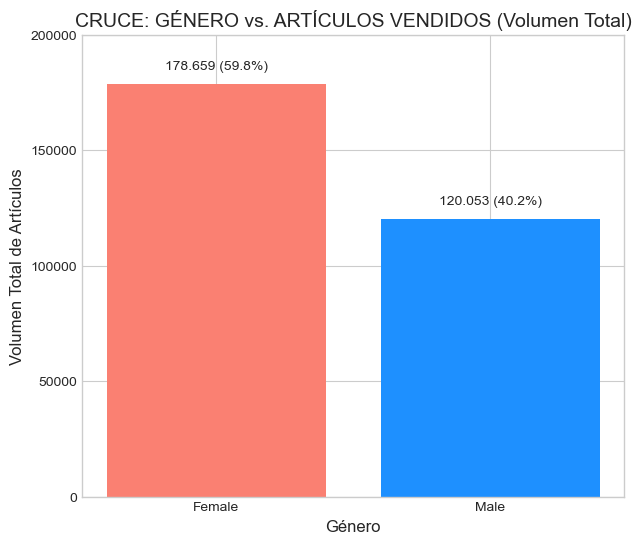

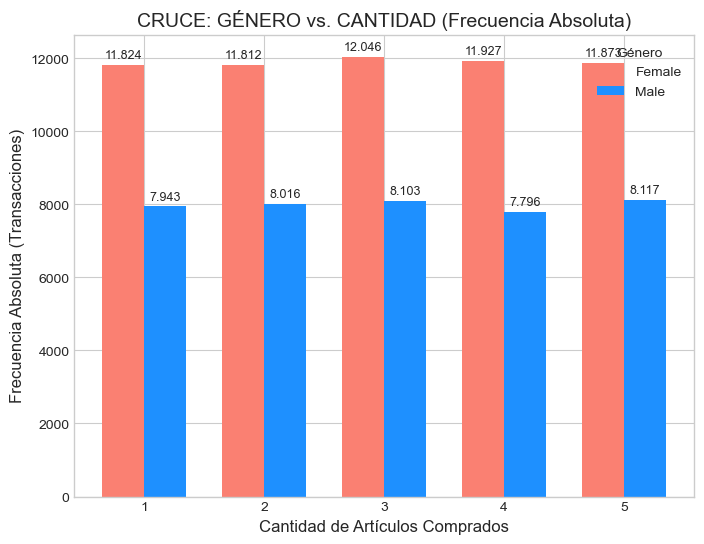

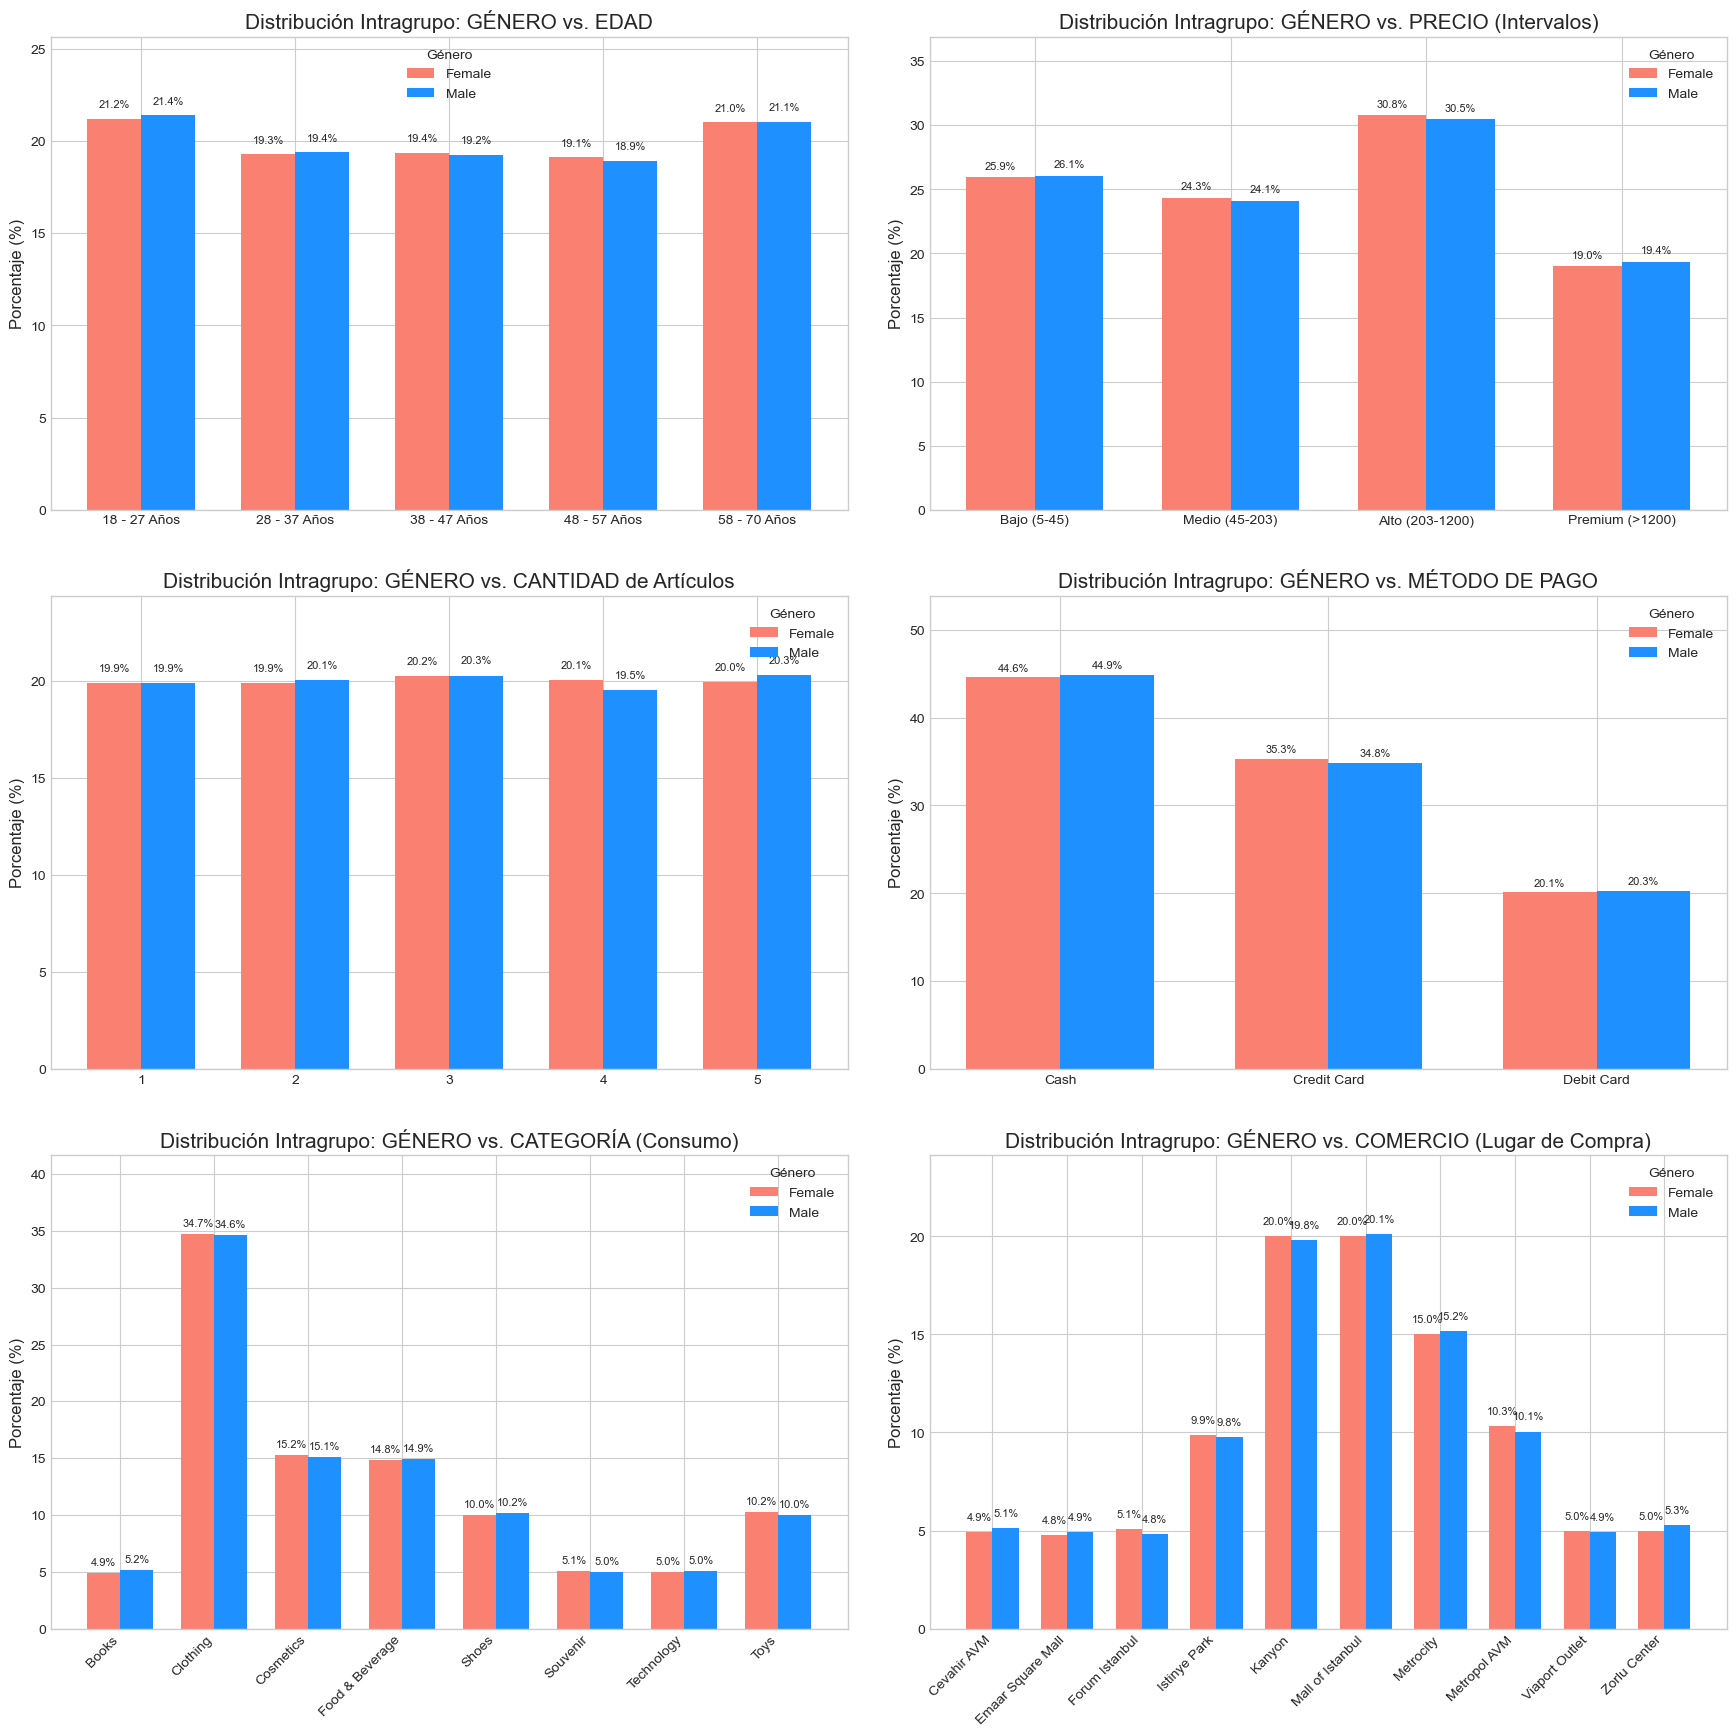

In [107]:


df_edad = pd.DataFrame({
    '18 - 27 Años': [21.20, 21.39],
    '28 - 37 Años': [19.29, 19.39],
    '38 - 47 Años': [19.37, 19.25],
    '48 - 57 Años': [19.13, 18.92],
    '58 - 70 Años': [21.01, 21.05]
}, index=['Female', 'Male'])

df_total_articulos = pd.DataFrame({
    'Total Artículos': [178659, 120053],
    'Porcentaje (%)': [59.81, 40.19]
}, index=['Female', 'Male'])

df_abs_quantity = pd.DataFrame({
    1: [11824, 7943],
    2: [11812, 8016],
    3: [12046, 8103],
    4: [11927, 7796],
    5: [11873, 8117]
}, index=['Female', 'Male'])

df_dist_quantity = pd.DataFrame({
    1: [19.88, 19.87],
    2: [19.86, 20.05],
    3: [20.25, 20.27],
    4: [20.05, 19.50],
    5: [19.96, 20.31]
}, index=['Female', 'Male'])

df_price = pd.DataFrame({
    'Bajo (5-45)': [25.93, 26.06],
    'Medio (45-203)': [24.31, 24.12],
    'Alto (203-1200)': [30.77, 30.46],
    'Premium (>1200)': [19.00, 19.36]
}, index=['Female', 'Male'])

df_category = pd.DataFrame({
    'Books': [4.89, 5.19],
    'Clothing': [34.72, 34.61],
    'Cosmetics': [15.25, 15.08],
    'Food & Beverage': [14.80, 14.94],
    'Shoes': [10.03, 10.17],
    'Souvenir': [5.07, 4.96],
    'Technology': [5.01, 5.04],
    'Toys': [10.23, 10.01]
}, index=['Female', 'Male'])

df_mall = pd.DataFrame({
    'Cevahir AVM': [4.94, 5.13],
    'Emaar Square Mall': [4.78, 4.93],
    'Forum Istanbul': [5.07, 4.83],
    'Istinye Park': [9.88, 9.77],
    'Kanyon': [20.02, 19.80],
    'Mall of Istanbul': [20.01, 20.12],
    'Metrocity': [15.03, 15.18],
    'Metropol AVM': [10.33, 10.05],
    'Viaport Outlet': [4.96, 4.92],
    'Zorlu Center': [4.99, 5.27]
}, index=['Female', 'Male'])

df_payment = pd.DataFrame({
    'Cash': [44.57, 44.87],
    'Credit Card': [35.32, 34.82],
    'Debit Card': [20.11, 20.31]
}, index=['Female', 'Male'])



plt.style.use('seaborn-v0_8-whitegrid')
female_color = '#FA8072'
male_color = '#1E90FF'
bar_width = 0.35

# ==============================================================================
# A. Gráfico: Volumen Total de Artículos por Género (Absoluto)
# ==============================================================================

plt.figure(figsize=(7, 6))
totals = df_total_articulos['Total Artículos']

plt.bar(df_total_articulos.index, totals, color=[female_color, male_color])
plt.title('CRUCE: GÉNERO vs. ARTÍCULOS VENDIDOS (Volumen Total)', fontsize=14)
plt.ylabel('Volumen Total de Artículos', fontsize=12)
plt.xlabel('Género', fontsize=12)
plt.yticks(ticks=np.arange(0, totals.max() + 50000, 50000))

for i, row in df_total_articulos.iterrows():
    plt.text(i, row['Total Artículos'] + 5000, 
             f"{int(row['Total Artículos']):,} ({row['Porcentaje (%)']:.1f}%)".replace(',', '.'), 
             ha='center', va='bottom', fontsize=10)

plt.show()

# ==============================================================================
# B. Gráfico: Frecuencia Absoluta de Cantidad de Artículos por Género
# ==============================================================================

plt.figure(figsize=(8, 6))
categories_abs = df_abs_quantity.columns.astype(str)
r_abs = np.arange(len(categories_abs))

bars1_abs = plt.bar(r_abs - bar_width/2, df_abs_quantity.loc['Female'], color=female_color, width=bar_width, label='Female')
bars2_abs = plt.bar(r_abs + bar_width/2, df_abs_quantity.loc['Male'], color=male_color, width=bar_width, label='Male')

plt.title('CRUCE: GÉNERO vs. CANTIDAD (Frecuencia Absoluta)', fontsize=14)
plt.ylabel('Frecuencia Absoluta (Transacciones)', fontsize=12)
plt.xlabel('Cantidad de Artículos Comprados', fontsize=12)
plt.xticks(r_abs, categories_abs)
plt.legend(title='Género')

for bar in bars1_abs:
    yval = bar.get_height()
    label = f'{int(yval):,}'
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, label.replace(',', '.'), ha='center', va='bottom', fontsize=9)
    
for bar in bars2_abs:
    yval = bar.get_height()
    label = f'{int(yval):,}'
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, label.replace(',', '.'), ha='center', va='bottom', fontsize=9)

plt.show()

# ==============================================================================
# C. Gráficos: Distribuciones Intragrupo (Porcentajes)
# ==============================================================================

dfs_distribucion = [
    (df_edad, 'GÉNERO vs. EDAD'),
    (df_price, 'GÉNERO vs. PRECIO (Intervalos)'),
    (df_dist_quantity, 'GÉNERO vs. CANTIDAD de Artículos'),
    (df_payment, 'GÉNERO vs. MÉTODO DE PAGO'),
    (df_category, 'GÉNERO vs. CATEGORÍA (Consumo)'),
    (df_mall, 'GÉNERO vs. COMERCIO (Lugar de Compra)'),
]

num_plots = len(dfs_distribucion)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
axes = axes.flatten()

for i, (df, title) in enumerate(dfs_distribucion):
    ax = axes[i]
    categories = df.columns
    r = np.arange(len(categories))
    
    bars1 = ax.bar(r - bar_width/2, df.loc['Female'], color=female_color, width=bar_width, label='Female')
    bars2 = ax.bar(r + bar_width/2, df.loc['Male'], color=male_color, width=bar_width, label='Male')
    
    ax.set_title(f'Distribución Intragrupo: {title}', fontsize=15)
    ax.set_ylabel('Porcentaje (%)', fontsize=12)
    ax.set_xticks(r)
    
    if len(categories) > 5:
        ax.set_xticklabels(categories, rotation=45, ha='right')
    else:
        ax.set_xticklabels(categories)
        
    ax.legend(title='Género')
    ax.set_ylim(0, df.max().max() * 1.20)

    for bar in bars1:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=8)
    for bar in bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout(pad=3.0)
plt.show()

_ Del entrecruzamiento de genero con las diferentes variables podemos extraer las siguientes conclusiones
  En términos generales las distribuciones son bastante homogéneas, presentando variaciones que no suelen ser mayores a los 2 puntos
  (debimos revisar los .csv varias veces ya que esto nos parecía poco probable)._

- GÉNERO/EDAD: En ambos casos predominan los rangos 18-27 y 58-70 con 21% de los compradores en ambos.
- GÉNERO /CANTIDAD: Asumimos que la diferencia que se percibe solo tiene que ver con que en la base de datos hay un mayor número de clientas
  que de clientes (60 a 40), y lo reforzamos al solicitar la frecuencia absoluta de cantidades. Los hombres tienen una tendencia levemente
  más marcada a realizar compras de 5 items.
- GÉNERO /PRECIO: Los hombres tienen una tendencia levemente más marcada a terminar con tickets pertenecientes al segmento Premium que
  las mujeres y lideran el segmento Bajo. Mientras que en el caso de los segmentos Medio y Alto son las mujeres las que lideran.
- GÉNERO /CATEGORIA: Respecto a que compran hombres y mujeres, los datos nos dicen que ellas tienden a consumir más ropa, cosméticos,
  souvenirs y juguetes, mientras que ellos destinan más dinero en la compra de calzado, comida y bebida, libros y tecnología.
- GÉNERO /COMERCIO: Las mujeres tienden a preferir consumir en Kanyon seguido por el Mall Of Istambul, mientras que los hombres
  invierten el orden de preferencias.
- GÉNERO/MEDIO DE PAGO: Ambos prefieren el efectivo pero los hombres lideran la categoria, mientras que las mujeres, en el segmento tarjetas de     credito, son quienes lideran.  

                               ### ANALISIS ENTRECRUZAMIENTO EDAD,GENERO Y METODOS DE PAGOS PREFERIDOS

In [108]:
print('\n--- CRUCE: GÉNERO, EDAD vs. MÉTODO DE PAGO (DISTRIBUCIÓN INTRAGRUPO) ---')
print('-' * 90)
frecuencia_pago_genero_edad = (df_analisis.groupby(['GENDER', 'AGE'])['PAYMENT METHOD'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
    .round(2))
print(frecuencia_pago_genero_edad)
print('-' * 90)


--- CRUCE: GÉNERO, EDAD vs. MÉTODO DE PAGO (DISTRIBUCIÓN INTRAGRUPO) ---
------------------------------------------------------------------------------------------
PAYMENT METHOD        Cash  Credit Card  Debit Card
GENDER AGE                                         
Female 18 - 27 Años  44.60        35.18       20.23
       28 - 37 Años  44.22        35.47       20.32
       38 - 47 Años  44.08        35.70       20.22
       48 - 57 Años  44.53        35.33       20.14
       58 - 70 Años  45.35        35.05       19.60
Male   18 - 27 Años  45.12        34.64       20.24
       28 - 37 Años  44.67        35.22       20.11
       38 - 47 Años  45.24        34.60       20.17
       48 - 57 Años  44.55        34.43       21.02
       58 - 70 Años  44.79        35.21       20.00
------------------------------------------------------------------------------------------


C:\Users\piafa\AppData\Local\Temp\ipykernel_11608\641216295.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencia_pago_genero_edad = (df_analisis.groupby(['GENDER', 'AGE'])['PAYMENT METHOD'].value_counts(normalize=True).mul(100).unstack(fill_value=0)


_No sobresale ningun rabgo etario, tanto en hombres como en mujeres, que se desvien de la costumbre cultural de utilizar predominantemente el efectivo.
Por otro lado si se observa que las muejeres teienden a utilizar efectivo mas asiduamente en las franjas de 18 a 27 y de 58 a 70, mientras que en los hombres la franja 58 a 70 es reemplazada por 38 a 47._

                                            ### ANALISIS ENTRECRUZAMIENTO CATEGORIA CON PRECIOS

In [109]:
print('\n--- CRUCE: CATEGORÍA vs. INTERVALOS DE PRECIO (DISTRIBUCIÓN INTRAGRUPO) ---')
print('-' * 90)
frecuencia_precio_categoria = (df_analisis.groupby('CATEGORY')['PRICE'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2))
print(frecuencia_precio_categoria)
print('-' * 90)


--- CRUCE: CATEGORÍA vs. INTERVALOS DE PRECIO (DISTRIBUCIÓN INTRAGRUPO) ---
------------------------------------------------------------------------------------------
PRICE            Bajo (5-45)  Medio (45-203)  Alto (203-1200)  Premium (>1200)
CATEGORY                                                                      
Books                  60.09           39.91             0.00             0.00
Clothing                0.00            0.00            79.88            20.12
Cosmetics              19.78           80.22             0.00             0.00
Food & Beverage       100.00            0.00             0.00             0.00
Shoes                   0.00            0.00            19.37            80.63
Souvenir               61.71           38.29             0.00             0.00
Technology              0.00            0.00            19.72            80.28
Toys                   19.83           80.17             0.00             0.00
------------------------------------------

_Producto del entrecruzamiento de las categorias con los rangos de precio presentes en los tickets, es que podemos
decir lo siguiente: _

- La comida y bebida lidera la categoria de tickets bajos, seguida por los souvenirs y los libros.
- El segmento medio muestra que juguetes y cosmetica se encuentran casi en paridad, liderando este ultimo.
- La ropa representa el mayor gasto de rango alto.
- El consumo del segmento premium se lo disputan el calzado y la tecnologia, siendo el primero el mas importante (pero por decimas).

                                                  ## VARIABLE CENTROS COMERCIALES

_Ahora analicemos cómo se comporta la variable centros comerciales cuando la relacionamos con:_

- PRECIOS: ¿Existe algún patrón de monto en los tickets que dependa de los centros comerciales?
- CATEGORIA: ¿Hay categorías de productos que se vendan más en un centro que en otro?
- MEDIOS DE PAGO: ¿Se observa variación en los medios de pago respecto a los centros comerciales?


In [110]:
frecuencia_precio_mall = (df_analisis.groupby('SHOPPING MALL')['PRICE'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2))
print('\n--- CRUCE: CENTRO COMERCIAL vs. PRECIO ---')
print('-' * 90)
print(frecuencia_precio_mall)
print('=' * 90)


frecuencia_categoria_mall = (df_analisis.groupby('SHOPPING MALL')['CATEGORY'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2))
print('\n--- CRUCE: CENTRO COMERCIAL vs. CATEGORÍA ---')
print('-' * 90)
print(frecuencia_categoria_mall)
print('=' * 90)


frecuencia_pago_mall = (df_analisis.groupby('SHOPPING MALL')['PAYMENT METHOD'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2))
print('\n--- CRUCE: CENTRO COMERCIAL vs. MÉTODO DE PAGO (PREFERENCIAS) ---')
print('-' * 90)
print(frecuencia_pago_mall)

print('======================================================================')


--- CRUCE: CENTRO COMERCIAL vs. PRECIO ---
------------------------------------------------------------------------------------------
PRICE              Bajo (5-45)  Medio (45-203)  Alto (203-1200)  \
SHOPPING MALL                                                     
Cevahir AVM              26.59           23.82            30.78   
Emaar Square Mall        25.61           24.26            30.22   
Forum Istanbul           26.26           24.80            30.10   
Istinye Park             26.06           24.45            30.28   
Kanyon                   26.21           24.08            30.55   
Mall of Istanbul         25.55           24.49            30.54   
Metrocity                26.05           24.01            31.20   
Metropol AVM             25.90           24.27            30.76   
Viaport Outlet           26.09           23.83            30.73   
Zorlu Center             25.97           24.18            30.94   

PRICE              Premium (>1200)  
SHOPPING MALL          

_ Ahora podemos afirmar que:_

- Respecto a los PRECIOS, el Emaar Square Mall es el shopping que mayor tickets Premium tiene, Metro City lidera en el segmento Alto, y el Medio y Bajo   pertenecen a Forum Istanbul. Aun asi hay que recordar que en ninguna categoría la diferencia logra ser de un punto porcentual, con lo cual la     distribución es muy homogénea.

-En CATEGORÍAS Cevahir AVM vende más Libros, Comida y Bebida. Metrocity se hace fuerte en Ropa. En Cosmética y Tecnología es el Emaar Square Mall. El Metropol AVM se posiciona en la venta de Calzados. La gente busca Souvenirs en el Forum Istambul mientras que los Juguetes son de Viaport Outlet.

-En MEDIOS DE PAGO, el mayor uso de Efectivo se da en el Zorlu Center, mientras que el Cevahir AVM lidera las compras con Crédito y en Debito ese lugar lo ocupa el Emaar Square Mall.

_ Como no conocemos Estambul, nos entro la duda sobre los barrios en los que los centros comerciales se encuentran emplazados. Razón por la cual le solicitamos a la IA que nos construyese una tabla donde pudiésemos observar el barrio, a que clase social pertenece y las coordenadas por si deseamos geo localizarlo._


                                                           # CARGAR DF LOCALIZACIÓN

In [112]:
df_localizacion = pd.read_excel('location.xlsx')

                                                           ## LIMPIEZA DE DATOS

In [114]:
df_localizacion.head()

,shopping_mall,distrito,rating,lat,lon,perfil_socioeconómico,descripcion
0,Cevahir AVM,Şişli,4.2,410632,289925,Medio / Masivo,"A pesar de su ubicación, está diseñado para at..."
1,Emaar Square Mall,Üsküdar,4.4,410035,290713,Alto / Clase Media-Alta,Atiende a la población de alto poder adquisiti...
2,Forum Istanbul,Bayrampaşa,4.1,410466,28897,Medio / Masivo,"Ubicado en barrios interiores, diseñado para u..."
3,İstinye Park,Sarıyer,4.5,411105,290332,Muy Alto / Lujo,Uno de los distritos más ricos y exclusivos de...
4,Kanyon,Şişli / Levent,4.3,410782,290173,Alto / Ejecutivos,Integrado en el principal distrito financiero.


In [115]:
df_localizacion.columns

Index(['shopping_mall', 'distrito', 'rating', 'lat', 'lon',
       'perfil_socioeconómico', 'descripcion'],
      dtype='object')

In [33]:
- Cambiar nombre de columnas en español por ingles.
- Poner todo en mayuscula.
- Reemplazar guiones bajos por espacios.

SyntaxError: invalid syntax (2347520269.py, line 1)

In [116]:
nuevos_nombres_en_ingles = ['SHOPPING_MALL', 'DISTRICT', 'RATING', 'LAT', 'LON', 'SOCIOECONOMIC_PROFILE', 'DESCRIPTION']
df_localizacion.columns = nuevos_nombres_en_ingles
df_localizacion.columns = [col.upper().replace('_', ' ') for col in df_localizacion.columns]
print(df_localizacion.columns)

Index(['SHOPPING MALL', 'DISTRICT', 'RATING', 'LAT', 'LON',
       'SOCIOECONOMIC PROFILE', 'DESCRIPTION'],
      dtype='object')


In [117]:
df_localizacion.head()

,SHOPPING MALL,DISTRICT,RATING,LAT,LON,SOCIOECONOMIC PROFILE,DESCRIPTION
0,Cevahir AVM,Şişli,4.2,410632,289925,Medio / Masivo,"A pesar de su ubicación, está diseñado para at..."
1,Emaar Square Mall,Üsküdar,4.4,410035,290713,Alto / Clase Media-Alta,Atiende a la población de alto poder adquisiti...
2,Forum Istanbul,Bayrampaşa,4.1,410466,28897,Medio / Masivo,"Ubicado en barrios interiores, diseñado para u..."
3,İstinye Park,Sarıyer,4.5,411105,290332,Muy Alto / Lujo,Uno de los distritos más ricos y exclusivos de...
4,Kanyon,Şişli / Levent,4.3,410782,290173,Alto / Ejecutivos,Integrado en el principal distrito financiero.


                               ## ANALISIS DE CENTRO COMERCIAL RESPECTO A DISTRITO Y PERFIL SOCIOECONOMICO

In [67]:
cruce_localizacion_socioeconomico = df_localizacion[['SHOPPING MALL','DISTRICT','SOCIOECONOMIC PROFILE']]
print('======================================================================')
print('        CRUCE: CENTRO COMERCIAL, DISTRITO y PERFIL SOCIOECONÓMICO')
print('======================================================================')
print(cruce_localizacion_socioeconomico)
print('======================================================================')

        CRUCE: CENTRO COMERCIAL, DISTRITO y PERFIL SOCIOECONÓMICO
       SHOPPING MALL        DISTRICT                SOCIOECONOMIC PROFILE
0        Cevahir AVM           Şişli                       Medio / Masivo
1  Emaar Square Mall         Üsküdar              Alto / Clase Media-Alta
2     Forum Istanbul      Bayrampaşa                       Medio / Masivo
3       İstinye Park         Sarıyer                      Muy Alto / Lujo
4             Kanyon  Şişli / Levent                    Alto / Ejecutivos
5   Mall of Istanbul      Başakşehir                           Media-Alta
6          Metrocity        Beşiktaş                           Medio-Alto
7       Metropol AVM        Ataşehir  Alto / Clase Media-Alta (Nuevo Hub)
8     Viaport Outlet          Pendik            Medio / Precio Consciente
9       Zorlu Center        Beşiktaş                      Muy Alto / Lujo


_ Con el dato del nivel socioeconómico donde se encuentran los shoppings es que nos entra la duda de porque los tickets Premium estan liderados por el Emaar Square Mall siendo que el Zorlu Center y el İstinye Park son los que se encuentran en distritos de lujo (inferimos que es porque el muestreo no esta realizado de manera correcta).
En el caso del Forum Istanbul, nuestro analisis anterior si se condice con lo que nos informa el dt_localizacion y los mismo aplica para el Metro City _

                     ## UNIR DISTRICT Y SOCIOECONOMIC PROFILE AL DF_ANALISIS Y EXPORTARLO A UN ARCHIVO .CSV

In [ ]:
#df_info_a_unir = df_localizacion[['SHOPPING MALL', 'DISTRICT', 'SOCIOECONOMIC PROFILE']].copy()
#df_analisis_final = pd.merge(df_analisis, df_info_a_unir, on='SHOPPING MALL', how='left')
#nombre_archivo = 'df_analisis_con_localizacion.csv'
#df_analisis_final.to_csv(nombre_archivo,index=False, encoding='utf-8')#

In [118]:
#Renombrar las columnas de coordenadas en df_localizacion para estandarizarlas
df_localizacion.rename(columns={'LAT': 'LATITUD', 'LON': 'LONGITUD'}, inplace=True)
print("Columnas de df_localizacion renombradas a LATITUD y LONGITUD.")

#Definir la información a unir (incluyendo coordenadas)
columnas_enriquecimiento = ['SHOPPING MALL', 'DISTRICT', 'SOCIOECONOMIC PROFILE', 'LATITUD', 'LONGITUD']
df_info_a_unir = df_localizacion[columnas_enriquecimiento].copy()

# Fusión de los datos de análisis con la localización
df_analisis_final = pd.merge(
    df_analisis,
    df_info_a_unir,
    on='SHOPPING MALL',
    how='left'
)
print("Fusión completada. El DataFrame final contiene coordenadas.")

#Limpieza de Coordenadas
# Aseguramos que los campos de coordenadas sean numéricos.
df_analisis_final['LATITUD'] = pd.to_numeric(df_analisis_final['LATITUD'], errors='coerce')
df_analisis_final['LONGITUD'] = pd.to_numeric(df_analisis_final['LONGITUD'], errors='coerce')


#Exportar el DataFrame Final Limpio y Enriquecido
nombre_archivo_final = 'df_analisis_final_con_geo.csv'
df_analisis_final.to_csv(nombre_archivo_final, index=False, encoding='utf-8')

print(f"\n--- ¡ETL COMPLETO! Archivo final '{nombre_archivo_final}' exportado, listo para Power BI y MySQL. ---")
print(df_analisis_final[['SHOPPING MALL', 'DISTRICT', 'LATITUD', 'LONGITUD']].sample(5))

Columnas de df_localizacion renombradas a LATITUD y LONGITUD.
Fusión completada. El DataFrame final contiene coordenadas.

--- ¡ETL COMPLETO! Archivo final 'df_analisis_final_con_geo.csv' exportado, listo para Power BI y MySQL. ---
      SHOPPING MALL        DISTRICT   LATITUD  LONGITUD
1238   Metropol AVM        Ataşehir   40994.0  291226.0
18681        Kanyon  Şişli / Levent  410782.0  290173.0
37647        Kanyon  Şişli / Levent  410782.0  290173.0
13595        Kanyon  Şişli / Levent  410782.0  290173.0
16990        Kanyon  Şişli / Levent  410782.0  290173.0


In [120]:
df_exportado = pd.read_csv('df_analisis_final_con_geo.csv')
print(df_exportado)

      CUSTOMER ID  GENDER PAYMENT METHOD         CATEGORY  QUANTITY  \
0         C100004    Male    Credit Card         Clothing         5   
1         C100005    Male           Cash            Shoes         2   
2         C100006    Male    Credit Card             Toys         3   
3         C100012    Male           Cash  Food & Beverage         5   
4         C100019  Female    Credit Card             Toys         1   
...           ...     ...            ...              ...       ...   
99452     C999886    Male     Debit Card  Food & Beverage         3   
99453     C999910    Male     Debit Card            Books         3   
99454     C999974  Female           Cash         Clothing         5   
99455     C999976  Female     Debit Card             Toys         3   
99456     C999995  Female           Cash         Clothing         2   

      INVOICE DATE     SHOPPING MALL           AGE            PRICE  \
0       26-11-2021         Metrocity  58 - 70 Años  Premium (>1200)   
1    

_ ACLARACION: Conservar la columna de la fecha de recibo no ha sido un error ni un descuido. La dejamos ya que si quisieramos ver si ha habido
modificaciones respecto a los patrones de consumo en el tiempo, la fecha de los recibos puede resultar util. _

In [72]:
#Instalación del paquete que permite la conexión con MySQL
!pip install pymysql
!pip install mysql-connector-python

In [73]:
#Importar módulos
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector

In [ ]:
# Datos de conexión
USUARIO = "root"
CONTRASEÑA = "Argentina2025!!"
HOST = "localhost"
PUERTO = "3306"
BASE_DE_DATOS = "innovacion1"
TABLA_DESTINO = "ventas1_temp"

# Crear la URL de conexión
DATABASE_URL = f"mysql+mysqlconnector://{USUARIO}:{CONTRASEÑA}@{HOST}:{PUERTO}/{BASE_DE_DATOS}"

# El motor de conexión está creado, lo redefinimos por si acaso
try:
    engine = create_engine(DATABASE_URL)
    print("Conexión con SQLAlchemy establecida.")
except Exception as e:
    print(f"Error al conectar: {e}")
    exit()


In [ ]:
#Carga del dataframe
try:
    print(f"Iniciando carga del DataFrame en {BASE_DE_DATOS}.{TABLA_DESTINO}...")

    # Usamos df_analisis_final
    df_analisis_final.to_sql(
        name=TABLA_DESTINO,
        con=engine,
        if_exists='replace',
        index=False,
    )
    # len(df_analisis_final) cuenta las filas
    print(f"\n✔ ¡Carga exitosa! Se cargaron {len(df_analisis_final)} registros en {BASE_DE_DATOS}.{TABLA_DESTINO}")

except Exception as e:
    print(f"\n✖ Error durante la carga a SQL: {e}")